In [ ]:
import torch
import matplotlib.pyplot as plt

from neural_style_transfer import (
    run_style_transfer, img_loader, device, cnn, 
    cnn_normalization_mean, cnn_normalization_std, 
    imshow
)

In [5]:
imsize = 512 if torch.cuda.is_available() else 128  # size of output image
img_dir = "images/"
content_img = img_loader(img_dir + "tajmahal.jpg", imsize)
style_img = img_loader(img_dir + "starrynight.jpg", imsize)

print(f"Content image shape: {content_img.shape}")
print(f"Style image shape: {style_img.shape}")

assert content_img.size() == style_img.size(), "Content and style images must have the same size"

Content image shape: torch.Size([1, 3, 128, 128])
Style image shape: torch.Size([1, 3, 128, 128])


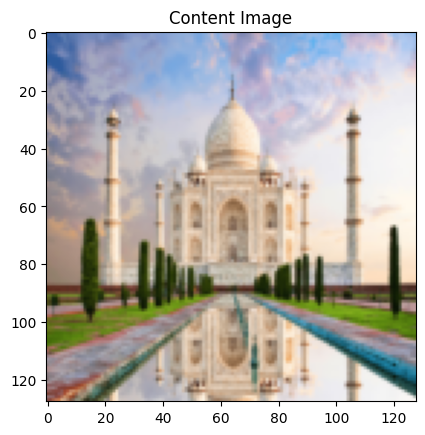

In [6]:
imshow(content_img, title='Content Image')

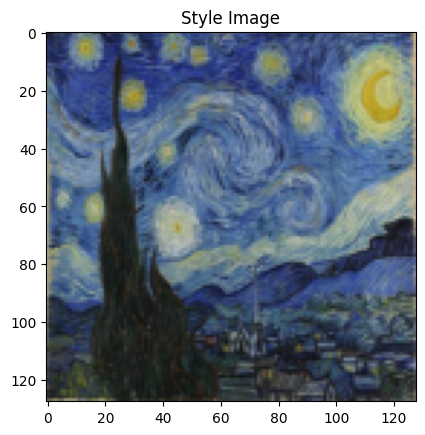

In [7]:
imshow(style_img, title='Style Image')

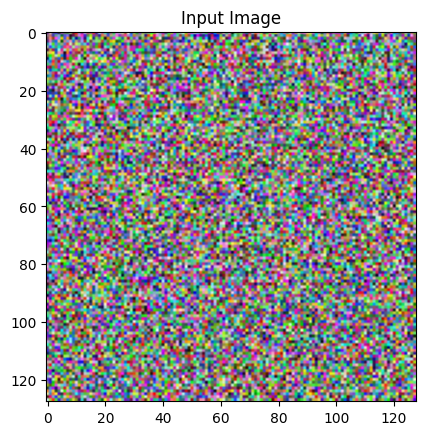

In [8]:
# Initialize input image (start with content image or white noise)
# Option 1: content image
# input_img = content_img.clone()

# Option 2: white noise (often gives more artistic results)
input_img = torch.randn(content_img.data.size(), device=device)

imshow(input_img, title='Input Image')

In [9]:
output = run_style_transfer(
    cnn, cnn_normalization_mean, cnn_normalization_std,
    content_img, style_img, input_img, 
    num_steps=300,  # Reduce for faster testing, increase for better quality
    style_weight=1000000, 
    content_weight=1
)

run [50]:
Style Loss : 16.452148 Content Loss: 35.890808

run [100]:
Style Loss : 6.457945 Content Loss: 22.695713

run [150]:
Style Loss : 4.453438 Content Loss: 16.855423

run [200]:
Style Loss : 3.678210 Content Loss: 14.055338

run [250]:
Style Loss : 3.234006 Content Loss: 12.714768

run [300]:
Style Loss : 2.964534 Content Loss: 11.884529



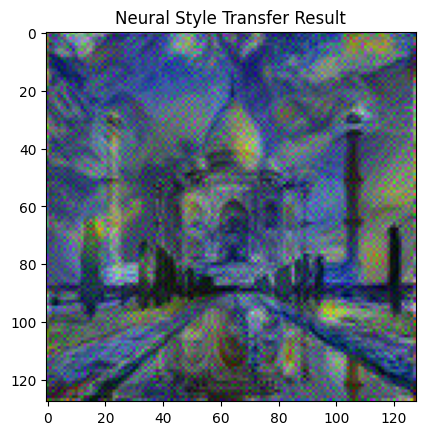

In [10]:
imshow(output, title='Neural Style Transfer Result')
result_image = output.cpu().clone()
result_image = result_image.squeeze(0)
result_image = unloader(result_image)
result_image.save('images/result3.jpg')

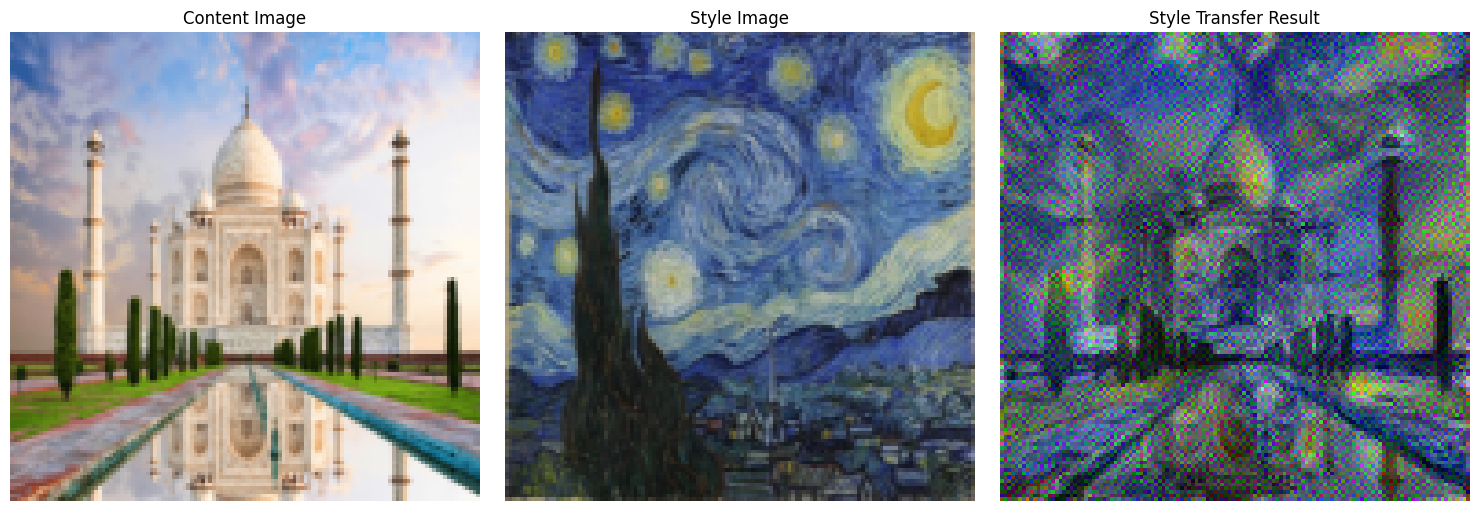

In [11]:
# Create side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

content_display = content_img.cpu().clone().squeeze(0)
content_display = unloader(content_display)
axes[0].imshow(content_display)
axes[0].set_title('Content Image')
axes[0].axis('off')

style_display = style_img.cpu().clone().squeeze(0)
style_display = unloader(style_display)
axes[1].imshow(style_display)
axes[1].set_title('Style Image')
axes[1].axis('off')

result_display = output.cpu().clone().squeeze(0)
result_display = unloader(result_display)
axes[2].imshow(result_display)
axes[2].set_title('Style Transfer Result')
axes[2].axis('off')

plt.tight_layout()
plt.show()

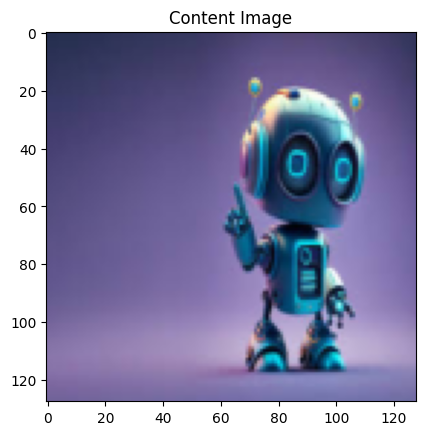

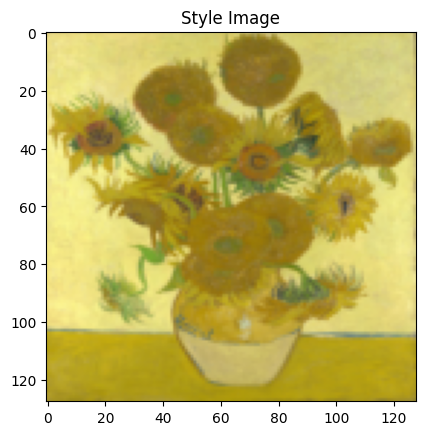

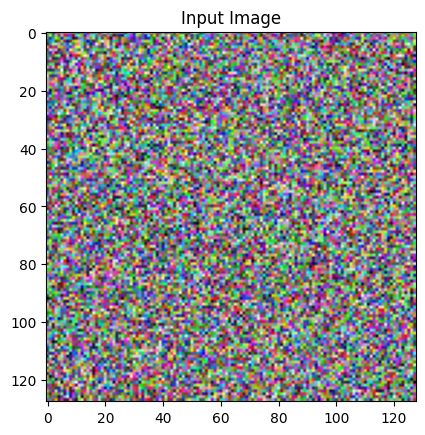

In [24]:
content_img = img_loader(img_dir + "robot.jpg", imsize)
style_img = img_loader(img_dir + "sunflowers.jpg", imsize)
imshow(content_img, title='Content Image')
imshow(style_img, title='Style Image')

# Initialize input image (start with content image or white noise)
# Option 1: content image
# input_img = content_img.clone()

# Option 2: white noise (often gives more artistic results)
input_img = torch.randn(content_img.data.size(), device=device)

imshow(input_img, title='Input Image')

In [25]:
output = run_style_transfer(
    cnn, cnn_normalization_mean, cnn_normalization_std,
    content_img, style_img, input_img, 
    num_steps=500,  # Reduce for faster testing, increase for better quality
    style_weight=1000000, 
    content_weight=1
)

run [50]:
Style Loss : 85.419884 Content Loss: 32.832073

run [100]:
Style Loss : 31.669464 Content Loss: 23.540758

run [150]:
Style Loss : 15.226431 Content Loss: 19.031816

run [200]:
Style Loss : 6.127850 Content Loss: 16.761127

run [250]:
Style Loss : 4.399160 Content Loss: 15.004358

run [300]:
Style Loss : 3.884434 Content Loss: 13.858426

run [350]:
Style Loss : 3.529308 Content Loss: 13.122599

run [400]:
Style Loss : 3.308766 Content Loss: 12.645030

run [450]:
Style Loss : 3.289733 Content Loss: 12.359241

run [500]:
Style Loss : 2.905826 Content Loss: 12.111836



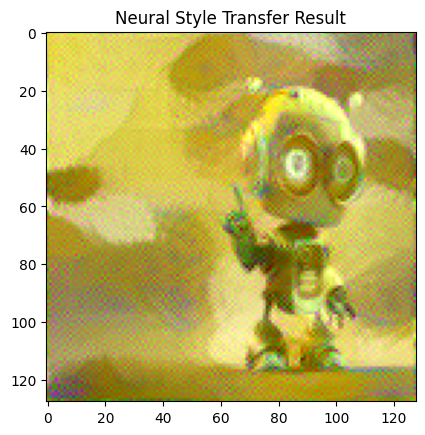

In [26]:
imshow(output, title='Neural Style Transfer Result')
result_image = output.cpu().clone()
result_image = result_image.squeeze(0)
result_image = unloader(result_image)
result_image.save('images/result3.jpg')

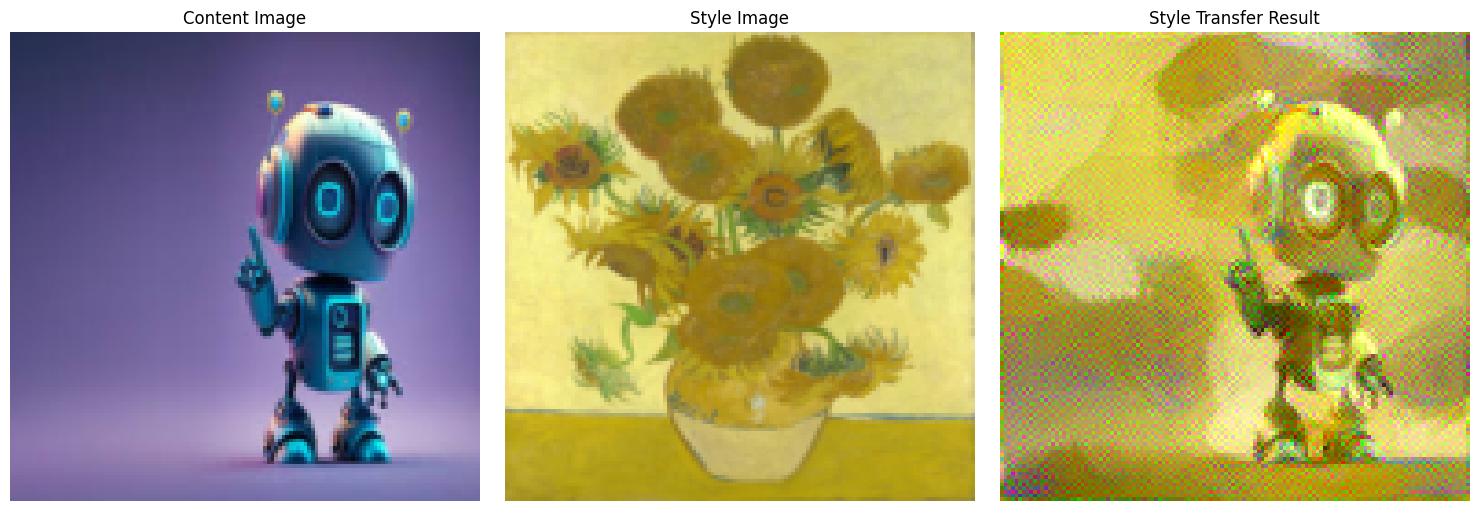

In [27]:
# Create side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

content_display = content_img.cpu().clone().squeeze(0)
content_display = unloader(content_display)
axes[0].imshow(content_display)
axes[0].set_title('Content Image')
axes[0].axis('off')

style_display = style_img.cpu().clone().squeeze(0)
style_display = unloader(style_display)
axes[1].imshow(style_display)
axes[1].set_title('Style Image')
axes[1].axis('off')

result_display = output.cpu().clone().squeeze(0)
result_display = unloader(result_display)
axes[2].imshow(result_display)
axes[2].set_title('Style Transfer Result')
axes[2].axis('off')

plt.tight_layout()
plt.show()